# Loading the data

In [1]:
# Installing pyarrow library
!pip install pyarrow

In [2]:
import pyarrow.parquet as pq

parquet_file_path = '/content/query_result_2000.993493Z (1).parquet'

# Reading the Parquet file
table = pq.read_table(parquet_file_path)

In [3]:
# Converting the PyArrow Table to a Pandas Df, to be easier to read
import pandas as pd

df = table.to_pandas()

In [4]:
df

title  \
0     Will the Covid-19 Grinch cancel a Santa rally ...   
1     SPDR S&P XOP ETF In A Multi-Year Uptrend; Buy ...   
2     Britain reports 10,000 new Omicron cases, ‘maj...   
3        Risk aversion sentiment continues to percolate   
4     Omicron rush on boosters may make it harder to...   
...                                                 ...   
1995  Covid cases rise in the US as Omicron now in o...   
1996  Factbox- banks tighten COVID-19 precautions as...   
1997  New SARS-CoV-2 variant a wake-up call for US, ...   
1998  Five new symptoms of Omicron - and how new var...   
1999  Watch now: County executive says omicron has c...   

                                              paragraph             news_list  \
0     OPINION: Stock markets typically trade higher ...   ["Supplier Market"]   
1     SPDR S&P Oil & Gas Exploration & Production ET...  ["Financial Health"]   
2     The total number of Omicron cases recorded acr...     ["Environmental"]   
3     - Risk aversion sentiment on rapid spread of t...       ["Commodities"]   
4     Countries are saying three vaccine doses are n...       ["Commodities"]   
...                                                 ...                   ...   
1995  Coronavirus infections are increasing in nearl...  ["Financial Health"]   
1996  U.S. banks have been more proactive than other...  ["Financial Health"]   
1997  A new variant of SARS-CoV-2 was first isolated...       ["Commodities"]   
1998  The NHS website still asks anyone with the thr...     ["Environmental"]   
1999  St. Louis County Executive Sam Page on Monday,...       ["Commodities"]   

           event_timestamp  
0     2021-12-20T12:34:00Z  
1     2021-12-20T12:31:00Z  
2     2021-12-20T12:31:00Z  
3     2021-12-20T12:30:00Z  
4     2021-12-20T12:16:00Z  
...                    ...  
1995  2021-12-14T01:37:00Z  
1996  2021-12-14T01:33:00Z  
1997  2021-12-14T01:28:00Z  
1998  2021-12-14T01:26:00Z  
1999  2021-12-14T01:26:00Z  

[2000 rows x 4 columns]

In [5]:
# Saving the df for future use
df.to_csv('raw_df.csv')

# Preprocessing

Preprocessing aims to clean, normalize, and transform the text data into a more structured and standardized format, making it easier for the models to understand and extract meaningful patterns.

In [6]:
df

title  \
0     Will the Covid-19 Grinch cancel a Santa rally ...   
1     SPDR S&P XOP ETF In A Multi-Year Uptrend; Buy ...   
2     Britain reports 10,000 new Omicron cases, ‘maj...   
3        Risk aversion sentiment continues to percolate   
4     Omicron rush on boosters may make it harder to...   
...                                                 ...   
1995  Covid cases rise in the US as Omicron now in o...   
1996  Factbox- banks tighten COVID-19 precautions as...   
1997  New SARS-CoV-2 variant a wake-up call for US, ...   
1998  Five new symptoms of Omicron - and how new var...   
1999  Watch now: County executive says omicron has c...   

                                              paragraph             news_list  \
0     OPINION: Stock markets typically trade higher ...   ["Supplier Market"]   
1     SPDR S&P Oil & Gas Exploration & Production ET...  ["Financial Health"]   
2     The total number of Omicron cases recorded acr...     ["Environmental"]   
3     - Risk aversion sentiment on rapid spread of t...       ["Commodities"]   
4     Countries are saying three vaccine doses are n...       ["Commodities"]   
...                                                 ...                   ...   
1995  Coronavirus infections are increasing in nearl...  ["Financial Health"]   
1996  U.S. banks have been more proactive than other...  ["Financial Health"]   
1997  A new variant of SARS-CoV-2 was first isolated...       ["Commodities"]   
1998  The NHS website still asks anyone with the thr...     ["Environmental"]   
1999  St. Louis County Executive Sam Page on Monday,...       ["Commodities"]   

           event_timestamp  
0     2021-12-20T12:34:00Z  
1     2021-12-20T12:31:00Z  
2     2021-12-20T12:31:00Z  
3     2021-12-20T12:30:00Z  
4     2021-12-20T12:16:00Z  
...                    ...  
1995  2021-12-14T01:37:00Z  
1996  2021-12-14T01:33:00Z  
1997  2021-12-14T01:28:00Z  
1998  2021-12-14T01:26:00Z  
1999  2021-12-14T01:26:00Z  

[2000 rows x 4 columns]

In [7]:
df['news_list'].value_counts()

["Environmental"]       545
["Commodities"]         506
["Delays"]              365
["Financial Health"]    303
["Compliance"]          160
["Supplier Market"]     121
Name: news_list, dtype: int64

In [8]:
# Getting rid of the brackets and double quotes for news_list
df['news_list'] = df['news_list'].apply(lambda x: x.split("\"")[1])
df['news_list'].value_counts()

Environmental       545
Commodities         506
Delays              365
Financial Health    303
Compliance          160
Supplier Market     121
Name: news_list, dtype: int64

In [9]:
# Reading one complete row
print(df.iloc[0]['title'])
print(df.iloc[0]['paragraph'])
print(df.iloc[0]['news_list'])
print(df.iloc[0]['event_timestamp'])

Will the Covid-19 Grinch cancel a Santa rally on the stock markets?
OPINION: Stock markets typically trade higher at this time with a ‘Santa rally’ as investors are typically in an ebullient mood, but Omicron could be the Grinch.
Supplier Market
2021-12-20T12:34:00Z


In [10]:
# Downloading necessary nltk data
import nltk

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [11]:
# Preprocessing Module
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

def preprocess_text(sentence):
  # Converting the text to lowercase
  sentence = sentence.lower()

  # Removing special characters and digits using regular expressions
  sentence = re.sub(r'[^a-zA-Z\s]', '', sentence)

  # Tokenization
  words = word_tokenize(sentence)

  # Removing basic stopwords
  stop_words = set(stopwords.words('english'))
  words = [word for word in words if word not in stop_words]

  # Lemmatization i.e. reducing words to their root form
  lemmatizer = WordNetLemmatizer()
  words = [lemmatizer.lemmatize(word) for word in words]

  # Joining the processed words back into a sentence
  processed_sentence = ' '.join(words)

  return processed_sentence

In [12]:
# Applying Preprocessing on 'title'
df['title'] = df['title'].apply(lambda x:preprocess_text(x))

In [13]:
df

title  \
0          covid grinch cancel santa rally stock market   
1             spdr sp xop etf multiyear uptrend buy dip   
2     britain report new omicron case major incident...   
3           risk aversion sentiment continues percolate   
4     omicron rush booster may make harder stop rise...   
...                                                 ...   
1995         covid case rise u omicron half state video   
1996  factbox bank tighten covid precaution omicron ...   
1997  new sarscov variant wakeup call u industrializ...   
1998  five new symptom omicron new variant differs o...   
1999  watch county executive say omicron caused spik...   

                                              paragraph         news_list  \
0     OPINION: Stock markets typically trade higher ...   Supplier Market   
1     SPDR S&P Oil & Gas Exploration & Production ET...  Financial Health   
2     The total number of Omicron cases recorded acr...     Environmental   
3     - Risk aversion sentiment on rapid spread of t...       Commodities   
4     Countries are saying three vaccine doses are n...       Commodities   
...                                                 ...               ...   
1995  Coronavirus infections are increasing in nearl...  Financial Health   
1996  U.S. banks have been more proactive than other...  Financial Health   
1997  A new variant of SARS-CoV-2 was first isolated...       Commodities   
1998  The NHS website still asks anyone with the thr...     Environmental   
1999  St. Louis County Executive Sam Page on Monday,...       Commodities   

           event_timestamp  
0     2021-12-20T12:34:00Z  
1     2021-12-20T12:31:00Z  
2     2021-12-20T12:31:00Z  
3     2021-12-20T12:30:00Z  
4     2021-12-20T12:16:00Z  
...                    ...  
1995  2021-12-14T01:37:00Z  
1996  2021-12-14T01:33:00Z  
1997  2021-12-14T01:28:00Z  
1998  2021-12-14T01:26:00Z  
1999  2021-12-14T01:26:00Z  

[2000 rows x 4 columns]

In [14]:
# Applying Preprocessing on 'paragraph'
df['paragraph'] = df['paragraph'].apply(lambda x:preprocess_text(x))
df

title  \
0          covid grinch cancel santa rally stock market   
1             spdr sp xop etf multiyear uptrend buy dip   
2     britain report new omicron case major incident...   
3           risk aversion sentiment continues percolate   
4     omicron rush booster may make harder stop rise...   
...                                                 ...   
1995         covid case rise u omicron half state video   
1996  factbox bank tighten covid precaution omicron ...   
1997  new sarscov variant wakeup call u industrializ...   
1998  five new symptom omicron new variant differs o...   
1999  watch county executive say omicron caused spik...   

                                              paragraph         news_list  \
0     opinion stock market typically trade higher ti...   Supplier Market   
1     spdr sp oil gas exploration production etf xop...  Financial Health   
2     total number omicron case recorded across coun...     Environmental   
3     risk aversion sentiment rapid spread omicron c...       Commodities   
4     country saying three vaccine dos needed protec...       Commodities   
...                                                 ...               ...   
1995  coronavirus infection increasing nearly every ...  Financial Health   
1996  u bank proactive industry encouraging employee...  Financial Health   
1997  new variant sarscov first isolated characteriz...       Commodities   
1998  nh website still asks anyone three traditional...     Environmental   
1999  st louis county executive sam page monday dec ...       Commodities   

           event_timestamp  
0     2021-12-20T12:34:00Z  
1     2021-12-20T12:31:00Z  
2     2021-12-20T12:31:00Z  
3     2021-12-20T12:30:00Z  
4     2021-12-20T12:16:00Z  
...                    ...  
1995  2021-12-14T01:37:00Z  
1996  2021-12-14T01:33:00Z  
1997  2021-12-14T01:28:00Z  
1998  2021-12-14T01:26:00Z  
1999  2021-12-14T01:26:00Z  

[2000 rows x 4 columns]

In [15]:
# Saving the data for future use
df.to_csv('preprocessed_df.csv')

# Exploratory Data Analysis

In [16]:
# Total columns
df.columns

Index(['title', 'paragraph', 'news_list', 'event_timestamp'], dtype='object')

In [17]:
# Total number of categories
df['news_list'].value_counts()

Environmental       545
Commodities         506
Delays              365
Financial Health    303
Compliance          160
Supplier Market     121
Name: news_list, dtype: int64

In [18]:
# installing a visualization package
!pip install plotly

## Class Distribution and Temporal Analysis

Exploring the class distribution in the 'news_list' column to understand how the different categories are distributed in the dataset. This information will help us identify any class imbalance issues, which can be important for classification tasks.

In [21]:
# Visualizing class distribution
import plotly.express as px

category_counts = df['news_list'].value_counts().reset_index()
category_counts.columns = ['news_list', 'count']

# Sorting the categories by count in descending order
category_counts = category_counts.sort_values('count', ascending=False)

# Creating the Plotly bar plot
fig = px.bar(
    category_counts,
    x='news_list',
    y='count',
    color='news_list',  # To give each category a different color
    labels={'count': 'Number of Articles'},
    title='Class Distribution of News Categories'
)

# Customizing the plot
fig.update_layout(
    xaxis_title='News Category',
    yaxis_title='Number of Articles',
    xaxis_tickangle=-45,
)

fig.show()

Insights: Here, we see that most of the labels are classfied as 'Environmental', and there is a class imbalance, the worst being 1:5. This can improved by oversampling, undersampling or using adverserial deep networks to generate fake data.

**Temporal Analysis**: The 'event_timestamp' column contains timestamp information, and we can analyze the distribution of articles over time. This might help us identify any trends or seasonality in the occurrence of news articles related to specific categories.

In [22]:
# Temporal Analysis
import plotly.graph_objects as go

# Converting to datetime object
df['event_timestamp'] = pd.to_datetime(df['event_timestamp'])

# Group the data by date and count the number of articles on each date
date_counts = df['event_timestamp'].value_counts().reset_index()
date_counts.columns = ['date', 'count']

# Sorting the data by date in ascending order
date_counts = date_counts.sort_values('date')

fig = go.Figure()

fig.add_trace(go.Scatter(x=date_counts['date'], y=date_counts['count'],
                         mode='lines+markers', line=dict(color='blue'),
                         marker=dict(size=8),
                         name='Number of Articles'))

# Customizing the plot
fig.update_layout(
    title='Temporal Analysis: Article Count Over Time',
    xaxis_title='Date',
    yaxis_title='Number of Articles',
    xaxis_tickformat='%Y-%m-%d',  # Format x-axis ticks to display date in YYYY-MM-DD format
    xaxis_tickangle=-45,  # Rotate x-axis labels for better readability
)

fig.show()

Insights: The date ranged between 6 days, and the highest number of articles sourced is 4 in a day. The first reaction may be that it won't be that much important in our classification task. **But**, we are solving for real-time updates, so it is extreamly crucial for us to take in account the timing of the articles

In [51]:
# Grouping the data by the 'news_list' category and count occurrences
category_counts = df['news_list'].value_counts().reset_index()
category_counts.columns = ['news_list', 'count']

category_counts = category_counts.sort_values('count', ascending=False)

# Group the data by 'news_list' and 'event_timestamp', and count occurrences
category_time_counts = df.groupby(['news_list', 'event_timestamp']).size().reset_index(name='count')

# Create the Plotly line plot for temporal analysis
fig_time = px.line(
    category_time_counts,
    x='event_timestamp',
    y='count',
    color='news_list',
    labels={'count': 'Number of Articles'},
    title='Temporal Analysis of Class Distribution'
)

fig_time.show()

Insights: More or less, not much of a difference, except a few outliers

## Text Analysis

Text analysis of the 'title' and 'paragraph' columns to gain insights into the language used in the articles

In [23]:
# Word Frequency Analysis
from collections import Counter

title_word_freq = Counter(" ".join(df['title']).split()).most_common(20)
paragraph_word_freq = Counter(" ".join(df['paragraph']).split()).most_common(20)

fig = go.Figure()

# Title Word Frequency Bar Chart
fig.add_trace(go.Bar(x=[word[0] for word in title_word_freq], y=[word[1] for word in title_word_freq],
                     name='Title Word Frequency'))

# Paragraph Word Frequency Bar Chart
fig.add_trace(go.Bar(x=[word[0] for word in paragraph_word_freq], y=[word[1] for word in paragraph_word_freq],
                     name='Paragraph Word Frequency'))

# Updating the layout
fig.update_layout(title='Most Common Words in Titles and Paragraphs',
                  xaxis_title='Words',
                  yaxis_title='Frequency')

# Show the plot
fig.show()

Insights: From here, we get to see that some words like 'omicron' and 'variant' have been used throughout the title and paragraphs.

In [26]:
# Most Common n-grams
from nltk.util import ngrams

# Create Bi-grams and Tri-grams
def get_ngrams(text_list, n):
    return list(ngrams(text_list, n))

df['title_bigrams'] = df['title'].apply(lambda x: get_ngrams(x.split(' '), 2))
df['paragraph_bigrams'] = df['paragraph'].apply(lambda x: get_ngrams(x.split(' '), 2))

df['title_trigrams'] = df['title'].apply(lambda x: get_ngrams(x.split(' '), 3))
df['paragraph_trigrams'] = df['paragraph'].apply(lambda x: get_ngrams(x.split(' '), 3))

# Calculate Bi-gram and Tri-gram Frequencies
title_bigram_freq = Counter([gram for sublist in df['title_bigrams'] for gram in sublist])
paragraph_bigram_freq = Counter([gram for sublist in df['paragraph_bigrams'] for gram in sublist])

title_trigram_freq = Counter([gram for sublist in df['title_trigrams'] for gram in sublist])
paragraph_trigram_freq = Counter([gram for sublist in df['paragraph_trigrams'] for gram in sublist])

# Print the most common Bi-grams and Tri-grams
print("Most Common Bi-grams in Titles:")
print(title_bigram_freq.most_common(10))

print("\nMost Common Bi-grams in Paragraphs:")
print(paragraph_bigram_freq.most_common(10))

print("\nMost Common Tri-grams in Titles:")
print(title_trigram_freq.most_common(10))

print("\nMost Common Tri-grams in Paragraphs:")
print(paragraph_trigram_freq.most_common(10))

Most Common Bi-grams in Titles:
[(('omicron', 'variant'), 446), (('omicron', 'case'), 134), (('case', 'omicron'), 101), (('covid', 'case'), 88), (('covid', 'variant'), 62), (('first', 'case'), 55), (('omicron', 'covid'), 51), (('omicron', 'spread'), 46), (('covid', 'omicron'), 42), (('variant', 'case'), 37)]

Most Common Bi-grams in Paragraphs:
[(('omicron', 'variant'), 1075), (('case', 'omicron'), 177), (('omicron', 'case'), 170), (('spread', 'omicron'), 133), (('covid', 'case'), 133), (('coronavirus', 'variant'), 127), (('omicron', 'coronavirus'), 121), (('covid', 'variant'), 121), (('variant', 'coronavirus'), 115), (('new', 'omicron'), 112)]

Most Common Tri-grams in Titles:
[(('case', 'omicron', 'variant'), 65), (('first', 'case', 'omicron'), 46), (('omicron', 'variant', 'case'), 33), (('omicron', 'covid', 'variant'), 30), (('covid', 'omicron', 'variant'), 26), (('omicron', 'variant', 'detected'), 19), (('omicron', 'variant', 'covid'), 18), (('spread', 'omicron', 'variant'), 17), (

Insights: Here we get to see the most number of pair of words used in the articles. Clearly 'omicron variant' wins

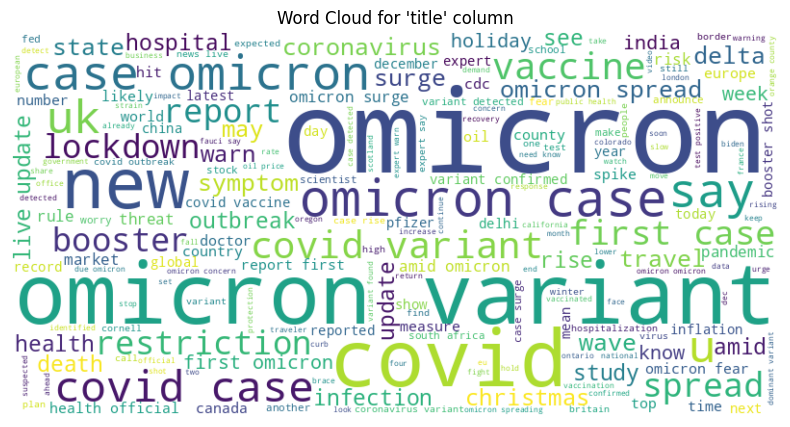

In [60]:
# Word Cloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generating Word Cloud for 'title' column
title_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(set(df['title'])))
plt.figure(figsize=(10, 5))
plt.imshow(title_wordcloud, interpolation='bilinear')
plt.title("Word Cloud for 'title' column")
plt.axis("off")
plt.show()

Insights: Another cool way of seeing out the words used in 'title', and judging from the sizes, one can easily figure out the tone of majority of articles quite easily

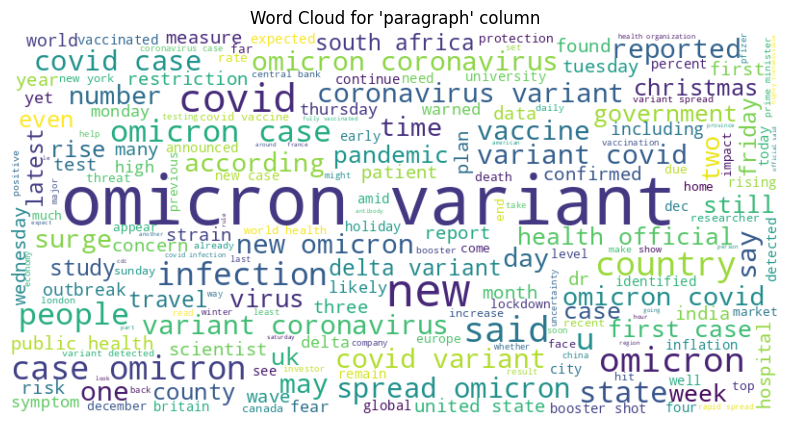

In [63]:
# Word Cloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generating Word Cloud for 'paragraph' column
title_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(set(df['paragraph'])))
plt.figure(figsize=(10, 5))
plt.imshow(title_wordcloud, interpolation='bilinear')
plt.title("Word Cloud for 'paragraph' column")
plt.axis("off")
plt.show()

<ipython-input-79-ab9b35e5ccf8>:11: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-79-ab9b35e5ccf8>:14: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-79-ab9b35e5ccf8>:20: FutureWarning:

In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.



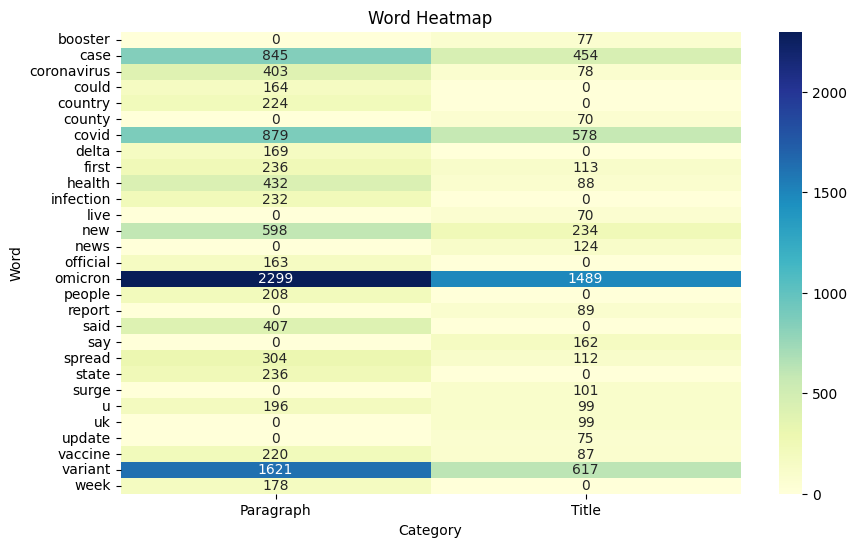

In [79]:
# Word Heatmap
import seaborn as sns

# Select the top N words for the heatmap
N = 20
top_title_words = df['title'].str.split(expand=True).stack().value_counts().head(N)
top_paragraph_words = df['paragraph'].str.split(expand=True).stack().value_counts().head(N)

# Create a DataFrame for the word heatmap
heatmap_data = pd.DataFrame(columns=['Word', 'Category', 'Frequency'])
heatmap_data = heatmap_data.append(pd.DataFrame({'Word': top_title_words.index,
                                                 'Category': 'Title',
                                                 'Frequency': top_title_words.values}), ignore_index=True)
heatmap_data = heatmap_data.append(pd.DataFrame({'Word': top_paragraph_words.index,
                                                 'Category': 'Paragraph',
                                                 'Frequency': top_paragraph_words.values}), ignore_index=True)

# Create the word heatmap
plt.figure(figsize=(10, 6))
heatmap = heatmap_data.pivot('Word', 'Category', 'Frequency').fillna(0)
sns.heatmap(heatmap, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Word Heatmap')
plt.xlabel('Category')
plt.ylabel('Word')
plt.show()

Insights: The same thing, but represented with some more details and colors.

## NER Visualization

NER (Named Entity Recognition) is crucial in the supply chain disruption decision platform of Kavida.ai because it enables the system to identify and extract important entities from unstructured text data, such as news articles, reports, or social media posts. It can be helpful in Risk Detection, Impact Assessment and data integration


In [ ]:
# Downloading spacy libraries
!pip install spacy
!python -m spacy download en_core_web_sm

In [82]:
import pandas as pd
import spacy
from spacy import displacy

# Load the spaCy English language model
nlp = spacy.load('en_core_web_sm')

# Function to process text and perform NER
def process_text_and_ner(text):
  doc = nlp(text)
  return doc

In [83]:
# Apply NER to the 'title' and 'paragraph' columns
df['title_ner'] = df['title'].apply(lambda x: process_text_and_ner(x))
df['paragraph_ner'] = df['paragraph'].apply(lambda x: process_text_and_ner(x))

In [84]:
# Function to visualize NER using spaCy's displacy
def visualize_ner(doc):
  displacy.render(doc, style='ent', jupyter=True)

In [88]:
# Visualize NER for a specific 'title'
for title in range(len(df['title_ner'])):
  visualize_ner(df['title_ner'][title])

/usr/local/lib/python3.10/dist-packages/spacy/displacy/__init__.py:215: UserWarning:

[W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.



In [89]:
# Visualize NER for a specific 'paragraph'
for title in range(len(df['paragraph_ner'])):
  visualize_ner(df['paragraph_ner'][title])

Insights: Here, we get to see many dates, time, orgs and countries identified easily, so that we can filter data very easily which will help us in pinpointing locations or datetimes of disruptions

In [91]:
# Function to extract NER items from a Doc object
def extract_ner_items(doc):
    ner_items = []
    for ent in doc.ents:
        ner_items.append((ent.text, ent.label_))
    return ner_items

# Extract NER items for the entire dataset
all_ner_items = []
for doc in df['title_ner']:
    all_ner_items.extend(extract_ner_items(doc))

for doc in df['paragraph_ner']:
    all_ner_items.extend(extract_ner_items(doc))

# Convert the list of NER items to a DataFrame for easier analysis
ner_items_df = pd.DataFrame(all_ner_items, columns=['Entity', 'Label'])

print(ner_items_df)

                   Entity     Label
0     covid grinch cancel    PERSON
1                 britain       GPE
2                  london       GPE
3                  israel       GPE
4                  canada       GPE
...                   ...       ...
6236         south africa       GPE
6237                three  CARDINAL
6238         louis county       GPE
6239             sam page    PERSON
6240               monday      DATE

[6241 rows x 2 columns]


In [93]:
ner_items_df['Label'].value_counts()

DATE           1486
GPE            1399
PERSON          991
ORG             828
CARDINAL        510
ORDINAL         427
NORP            310
LOC             172
TIME             82
FAC              14
PERCENT           5
PRODUCT           4
MONEY             3
LANGUAGE          3
EVENT             3
QUANTITY          2
LAW               1
WORK_OF_ART       1
Name: Label, dtype: int64

Insights: Some extra info about NER

## Topic Modelling Visualization
LDA (Latent Dirichlet Allocation) is important in the context of Kavida.ai's supply-chain disruption decision platform because it enables intelligent data-driven solutions for proactive management of disruption risks. By using LDA, Kavida.ai can automatically identify latent topics within supply chain documents, such as news articles or reports. This allows for the detection of emerging disruption threats and potential risks before they occur. LDA's ability to reveal hidden patterns and themes in the data helps optimize resiliency decisions, minimize financial and consumer impact, and safeguard supply chains through integrated data-driven insights.

In [94]:
#installing libraries
!pip install gensim pyLDAvis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.6/17.6 MB 49.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 76.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 34.5 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 2.0.3 which is incompatible.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.25.1 which is incompatible.
tensorflow 2.12.0 

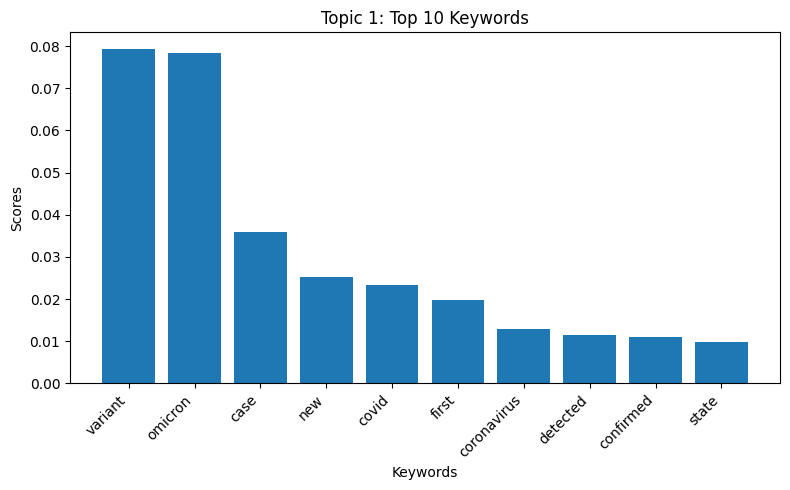

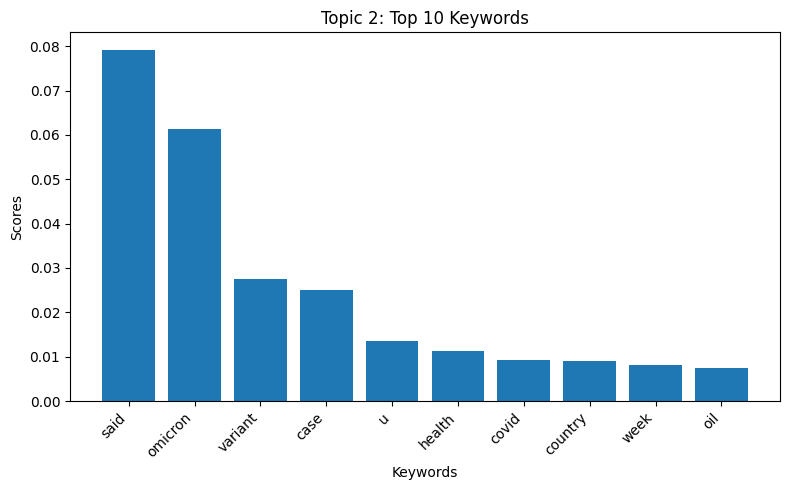

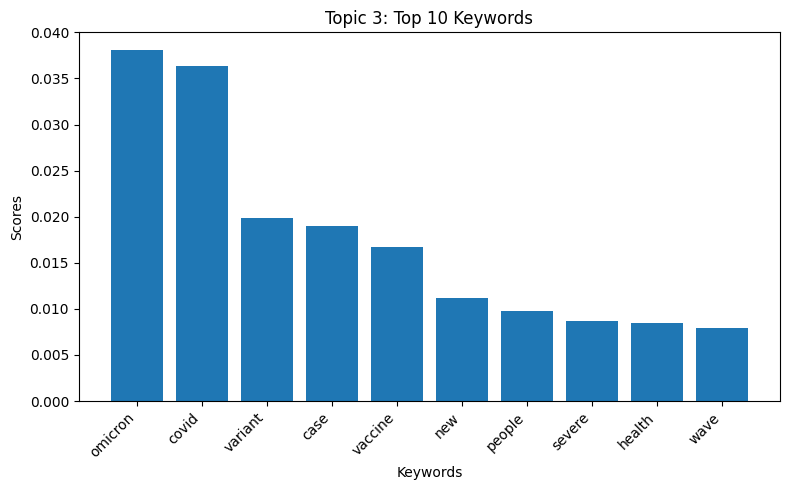

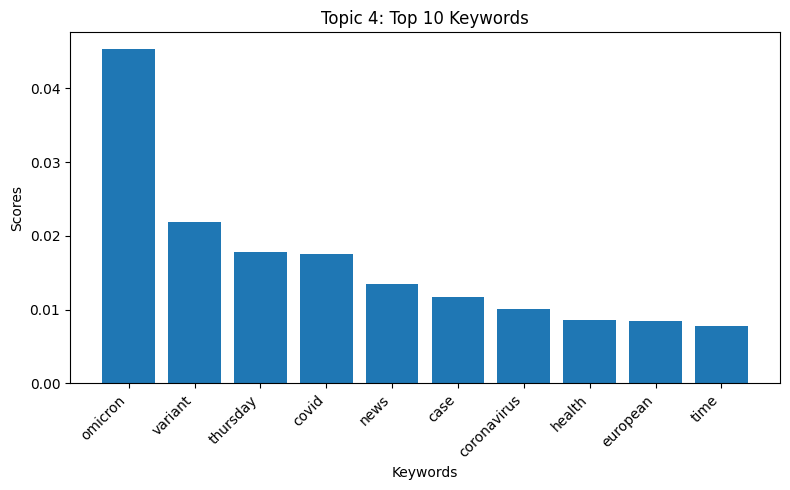

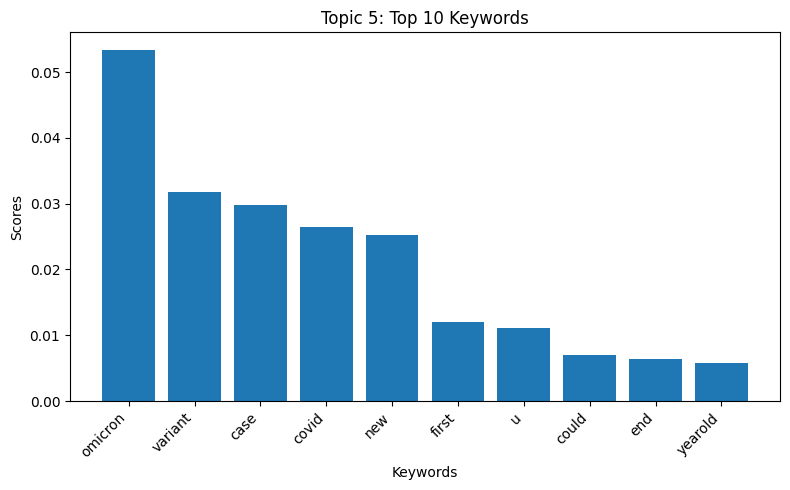

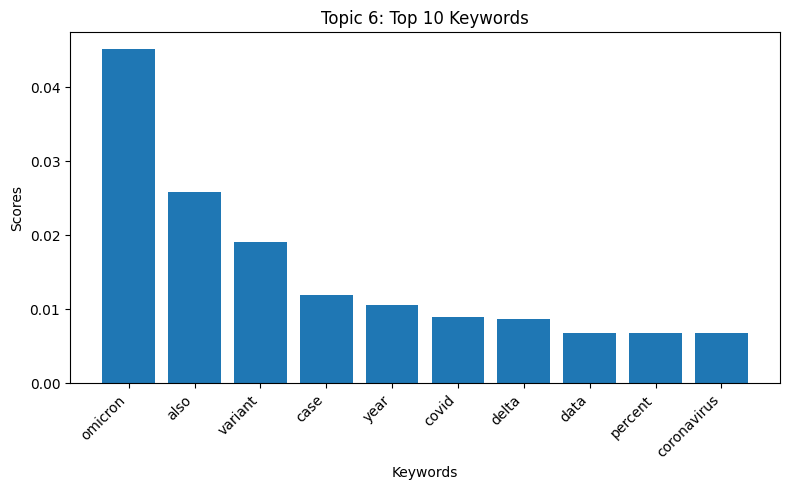

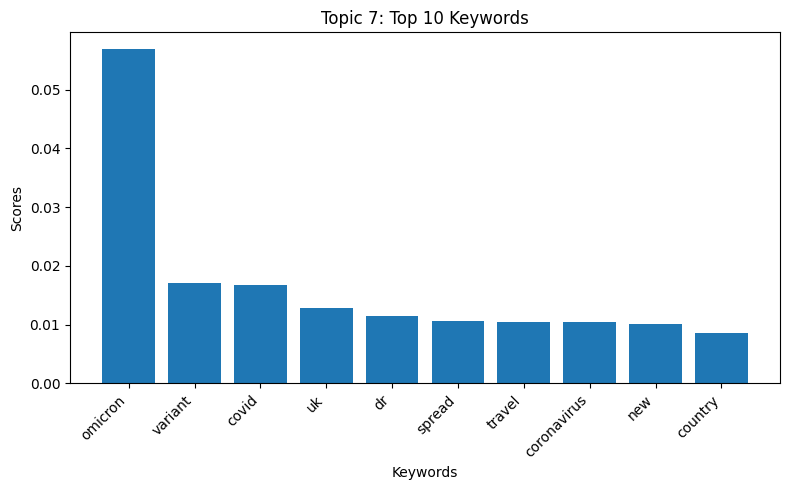

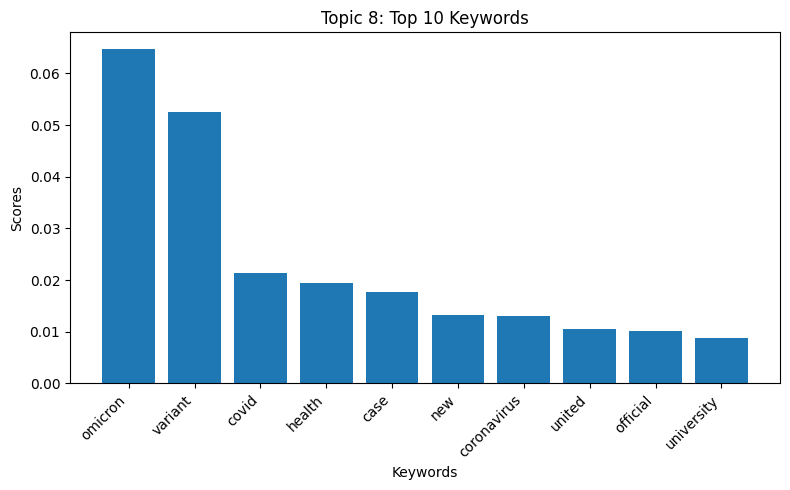

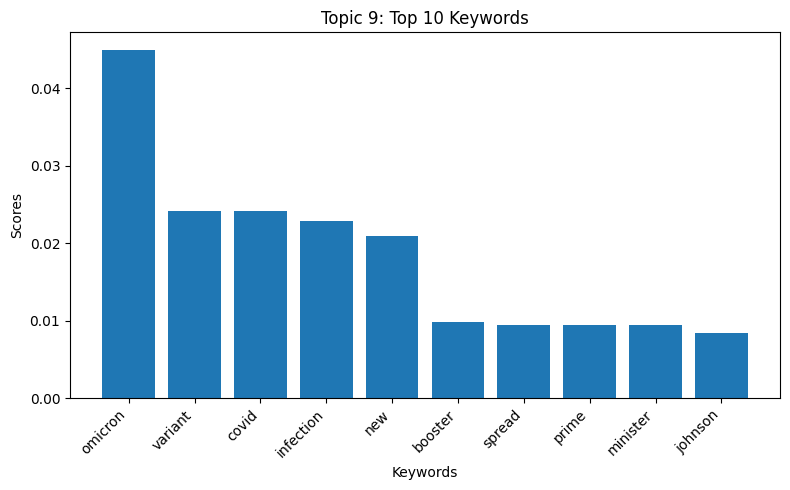

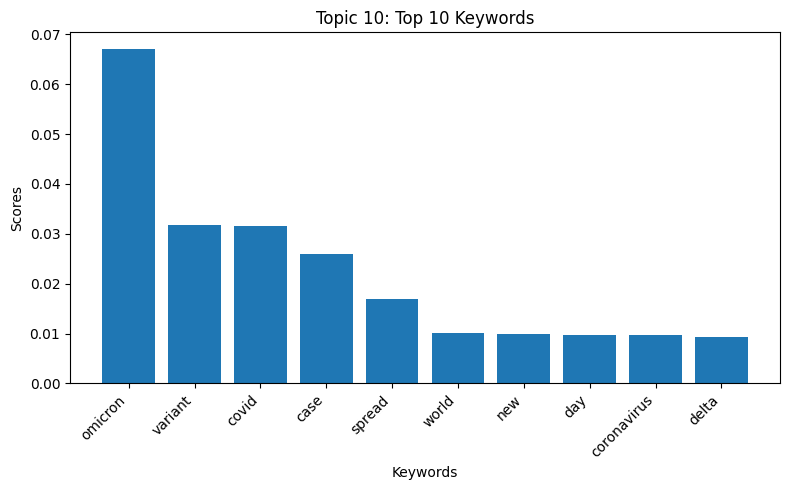

In [105]:
from gensim.corpora import Dictionary
from gensim.models import LdaModel

documents = df['title'].tolist() + df['paragraph'].tolist()

# Tokenize the documents and create a dictionary
documents_tokenized = [doc.split() for doc in documents]
dictionary = Dictionary(documents_tokenized)

# Convert the tokenized documents to bag-of-words format
corpus = [dictionary.doc2bow(doc) for doc in documents_tokenized]

# Train the LDA model
num_topics = 10
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)

# Visualize the top N keywords for each topic using bar charts
num_keywords = 10

for topic_id in range(num_topics):
    topic_keywords = lda_model.show_topic(topic_id, topn=num_keywords)
    keywords, scores = zip(*topic_keywords)
    plt.figure(figsize=(8, 5))
    plt.bar(keywords, scores)
    plt.title(f"Topic {topic_id + 1}: Top {num_keywords} Keywords")
    plt.xlabel("Keywords")
    plt.ylabel("Scores")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


Insights: Although the info is similar to word count, but LDA is an unsupervised machine learning algorithm that discovers latent topics within a collection of documents. It works by assuming that each document is a mixture of various topics, and each topic is a distribution over words. LDA uncovers these latent topics and assigns probabilities to words in each topic. It can be particularly useful in Kavida.ai's supply-chain disruption decision platform for identifying emerging disruption threats and optimizing resiliency decisions based on topic-based insights from supply chain-related documents.
